## Optimal parameters
 - Parameter values that bring the model in closest agreement with the data
 
## Packages to do statistical inference
 - scipy.stats
 - statsmodels
 - hacker stats with numpy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mlb_nohitters.csv', parse_dates=['date'], index_col='date')
df.head()

,game_number,winning_team,losing_team,winning_pitcher
date,,,,
1876-07-15,140,NaN,NaN,NaN
1880-06-12,1035,NaN,NaN,NaN
1880-06-17,1046,NaN,NaN,NaN
1880-08-19,1177,NaN,NaN,NaN
1880-08-20,1179,NaN,NaN,NaN


In [3]:
df.loc['1900-01-01':]

,game_number,winning_team,losing_team,winning_pitcher
date,,,,
1900-07-12,19435,NaN,NaN,NaN
1901-07-15,20279,NaN,NaN,NaN
1902-09-20,21893,NaN,NaN,NaN
1903-09-18,22995,NaN,NaN,NaN
1904-05-05,23211,NaN,NaN,NaN
...,...,...,...,...
2015-07-25,210250,PHI,CHN,Cole Hamels
2015-08-12,210490,SEA,BAL,Hisashi Iwakuma
2015-08-21,210610,HOU,LAN,Michael Fiers


In [4]:
nohitter_games = df.loc['1900-01-01':]['game_number'].values
print(len(nohitter_games))
print(nohitter_games[:5])

252
[19435 20279 21893 22995 23211]


In [5]:
nohitter_times = []

for i in range(len(nohitter_games)-1):
    nohitter_times.append(nohitter_games[i+1] - nohitter_games[i] - 1)  

In [6]:
nohitter_times = np.array(nohitter_times)
print(len(nohitter_times))
print(nohitter_times[:5])

251
[ 843 1613 1101  215  684]


## How often do we get no-hitters?

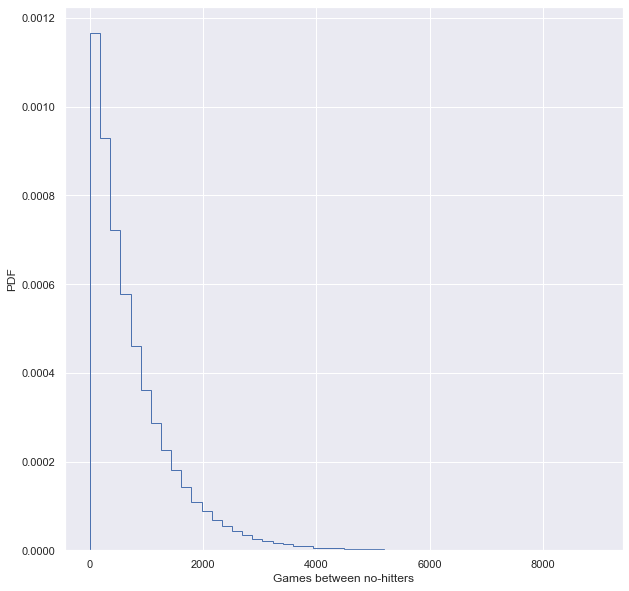

In [7]:
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
sns.set()
plt.figure(figsize=(10, 10))
plt.hist(inter_nohitter_time,
             bins=50, density=True, histtype='step')
plt.xlabel('Games between no-hitters')
plt.ylabel('PDF')

# Show the plot
plt.show()

## Do the data follow our story?

In [8]:
# ECDF(Empirical cumulative distribution function)
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

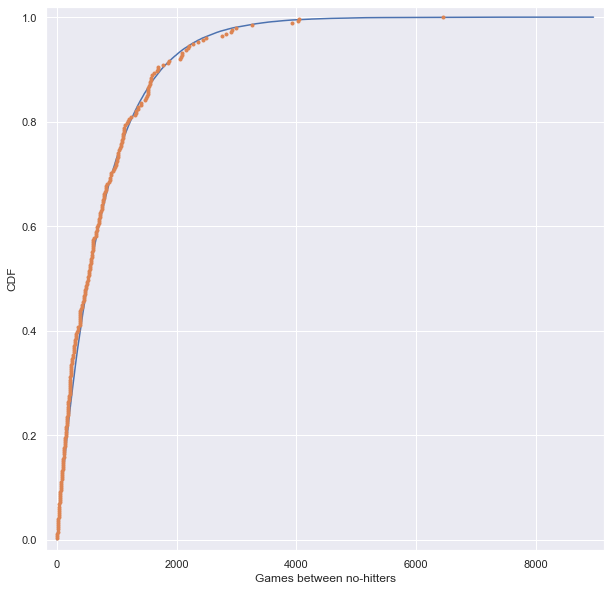

In [9]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.figure(figsize=(10, 10))
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

## How is this parameter optimal?

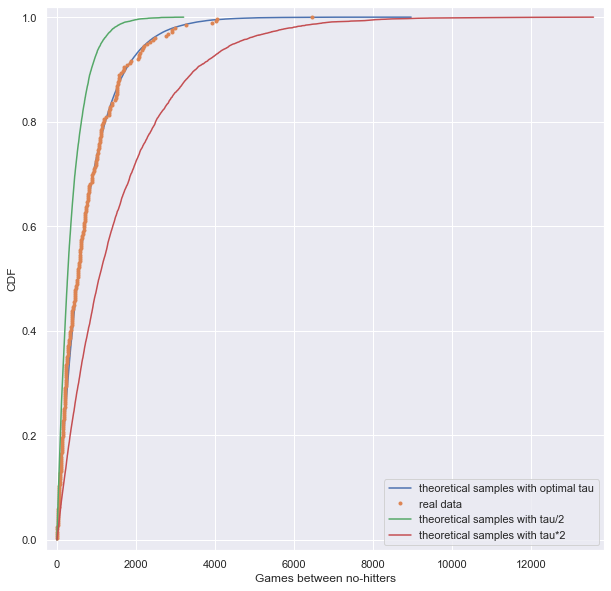

In [10]:
# Plot the theoretical CDFs
plt.figure(figsize=(10, 10))
plt.plot(x_theor, y_theor, label = 'theoretical samples with optimal tau')
plt.plot(x, y, marker='.', linestyle='none', label = 'real data')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau / 2, 10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(tau * 2, 10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
plt.plot(x_half, y_half, label = 'theoretical samples with tau/2')
plt.plot(x_double, y_double, label = 'theoretical samples with tau*2')

# Legend
plt.legend()

# Show the plot
plt.show()

## EDA of literacy/fertility data

In [11]:
df = pd.read_csv('female_literacy_fertility.csv')
df.head()

,Country,Continent,female literacy,fertility,population
0,Chine,ASI,90.5,1.769,"1,324,655,000"
1,Inde,ASI,50.8,2.682,"1,139,964,932"
2,USA,NAM,99.0,2.077,"304,060,000"
3,Indonésie,ASI,88.8,2.132,"227,345,082"
4,Brésil,LAT,90.2,1.827,"191,971,506"


In [12]:
fertility = df['fertility']
illiteracy = 100 - df['female literacy']

In [13]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

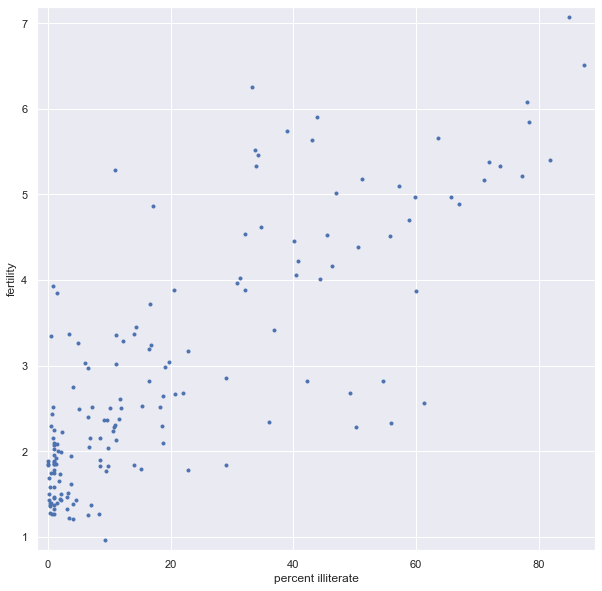

0.8041324026815347


In [14]:
# Plot the illiteracy rate versus fertility
plt.figure(figsize=(10, 10))
plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
plt.xlabel('percent illiterate')
plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))

## Linear regression

slope = 0.049798548090634255 children per woman / percent illiterate
intercept = 1.8880506106365562 children per woman


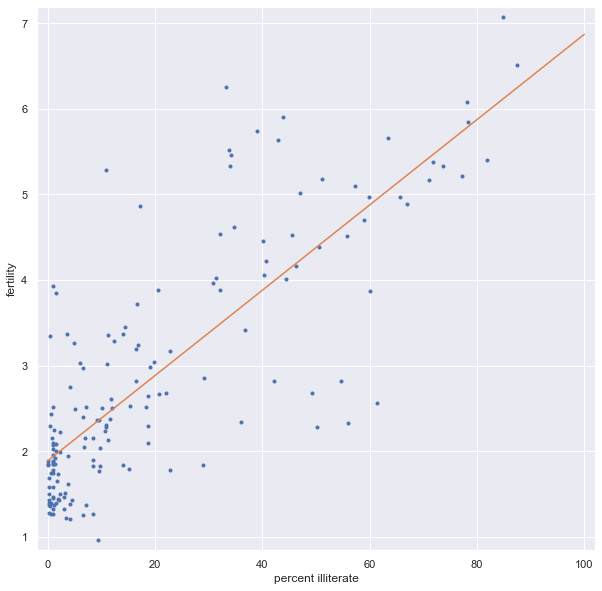

In [15]:
# Plot the illiteracy rate versus fertility
plt.figure(figsize=(10, 10))
plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
plt.xlabel('percent illiterate')
plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0, 100])
y = a * x + b

# Add regression line to your plot
plt.plot(x, y)

# Draw the plot
plt.show()

## How is it optimal?

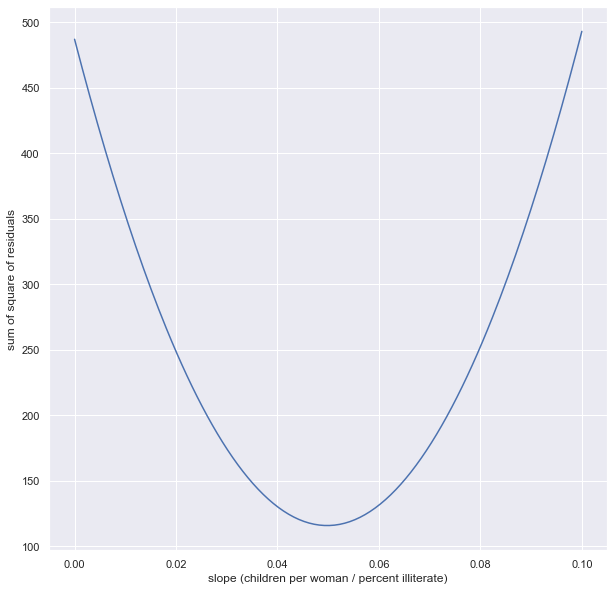

In [16]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a * illiteracy - b)**2)

# Plot the RSS
plt.figure(figsize=(10, 10))
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()

## Linear regression on appropriate Anscombe data

In [17]:
df = pd.read_csv('anscombe.csv')
df

,0,0.1,1,1.1,2,2.1,3,3.1
0,x,y,x,y,x,y,x,y
1,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
4,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
5,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
6,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
7,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
8,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
9,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56


In [18]:
df = df.drop(0, axis=0)
df.columns = ['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4']
df = df.astype('float')
df

,x1,y1,x2,y2,x3,y3,x4,y4
1,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
4,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
5,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
6,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
7,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
8,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
9,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
10,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


In [19]:
x = df['x1'].values
y = df['y1'].values

0.5000909090909094 3.000090909090908


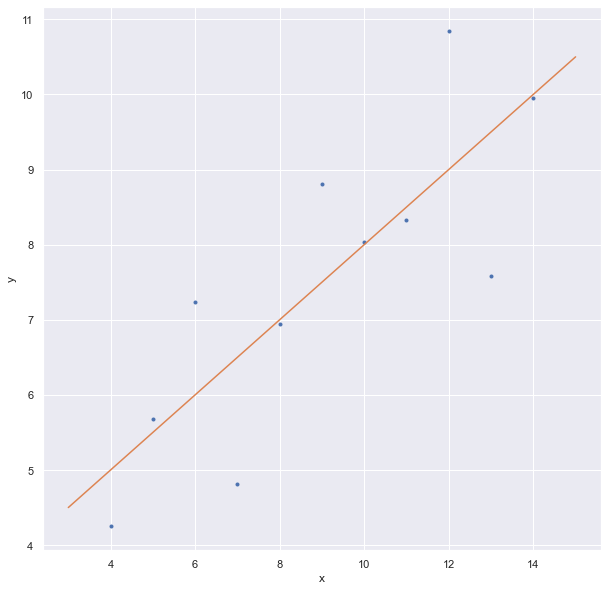

In [20]:
# Perform linear regression: a, b
a, b = np.polyfit(x, y, 1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
plt.figure(figsize=(10, 10))
plt.plot(x, y, marker='.', linestyle='none')
plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

## Linear regression on all Anscombe data

In [21]:
x1 = df['x1'].values
y1 = df['y1'].values
x2 = df['x2'].values
y2 = df['y2'].values
x3 = df['x3'].values
y3 = df['y3'].values
x4 = df['x4'].values
y4 = df['y4'].values

In [22]:
anscombe_x = [x1, x2, x3, x4]
anscombe_y = [y1, y2, y3, y4]

In [23]:
# Iterate through x,y pairs
for x, y in zip(anscombe_x, anscombe_y):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x, y, 1)

    # Print the result
    print('slope:', a, 'intercept:', b)

slope: 0.5000909090909094 intercept: 3.000090909090908
slope: 0.5000000000000003 intercept: 3.00090909090909
slope: 0.49972727272727313 intercept: 3.0024545454545453
slope: 0.4999090909090908 intercept: 3.001727272727274


## Plot all

In [24]:
def plot_anscombe(ax, x, y):
    
    # Perform linear regression: a, b
    a, b = np.polyfit(x, y, 1)
    
    # Generate theoretical x and y data: x_theor, y_theor
    x_theor = np.array([3, 20])
    y_theor = a * x_theor + b
    
    # Plot the Anscombe data and theoretical line
    ax.plot(x, y, marker='.', linestyle='none')
    ax.plot(x_theor, y_theor)
    
    # Label the axes
    ax.set_xlabel('x')
    ax.set_ylabel('y')

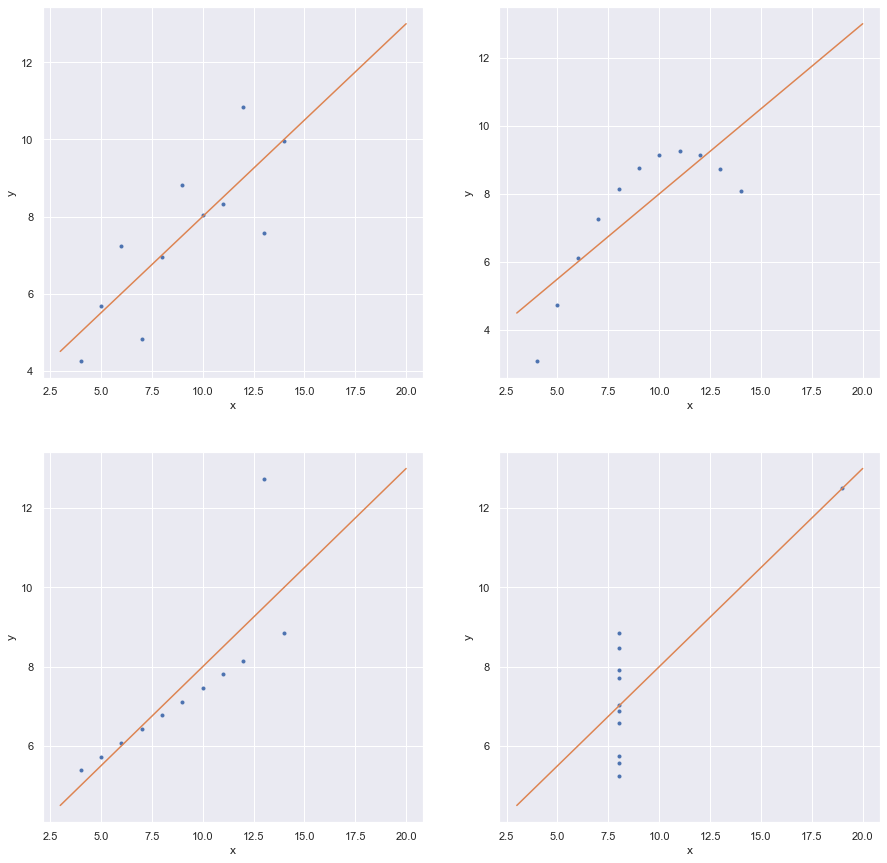

In [25]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 15))

plot_anscombe(ax1, x1, y1)
plot_anscombe(ax2, x2, y2)
plot_anscombe(ax3, x3, y3)
plot_anscombe(ax4, x4, y4)

plt.show()